# 定量图像分析
在对图像中的对象进行分割和标记之后，我们可以测量这些对象的属性。

另请参阅
* [SciPy 讲义：测量区域属性](https://scipy-lectures.org/packages/scikit-image/index.html#measuring-regions-properties)
* [绘制区域属性](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

在进行测量之前，我们需要一个`image`和相应的`label_image`。因此，我们回顾一下过滤、阈值处理和标记：

In [1]:
from skimage.io import imread
from skimage import filters
from skimage import measure
from pyclesperanto_prototype import imshow
import pandas as pd 
import numpy as np

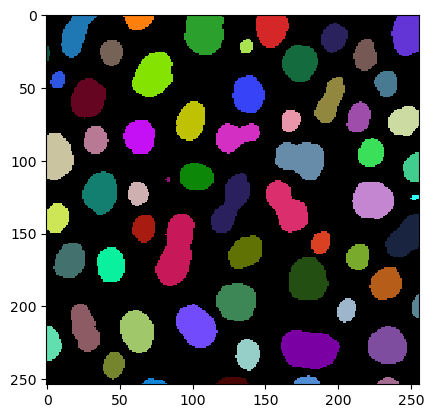

In [2]:
# load image
image = imread("../../data/blobs.tif")

# denoising
blurred_image = filters.gaussian(image, sigma=1)

# binarization
threshold = filters.threshold_otsu(blurred_image)
thresholded_image = blurred_image >= threshold

# labeling
label_image = measure.label(thresholded_image)

# visualization
imshow(label_image, labels=True)

## 测量 / 区域属性
为了读取区域的属性，我们使用[`regionprops`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops)函数：

In [3]:
# analyse objects
properties = measure.regionprops(label_image, intensity_image=image)

结果以`RegionProps`对象的形式存储，这些对象不是很直观：

In [4]:
properties[0:5]

如果你想知道我们测量了哪些属性：它们列在[`measure.regionprops`函数的文档](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops)中。基本上，我们现在有一个变量`properties`，它包含40个不同的特征。但我们只对其中的一小部分感兴趣。

因此，我们可以将测量结果重新组织成一个包含我们感兴趣的特征数组的字典：

In [5]:
statistics = {
    'area':       [p.area               for p in properties],
    'mean':       [p.mean_intensity     for p in properties],
    'major_axis': [p.major_axis_length  for p in properties],
    'minor_axis': [p.minor_axis_length for p in properties]
}

读取这些数组字典并不是很方便。为此，我们引入了数据科学家常用的[pandas DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)。"DataFrames"只是Python中用于"表格"的另一个术语。

In [8]:
df = pd.DataFrame(statistics)
df

area        mean  major_axis  minor_axis
0    429  191.440559   34.779230   16.654732
1    183  179.846995   20.950530   11.755645
2    658  205.604863   30.198484   28.282790
3    433  217.515012   24.508791   23.079220
4    472  213.033898   31.084766   19.681190
..   ...         ...         ...         ...
57   213  184.525822   18.753879   14.468993
58    79  184.810127   18.287489    5.762488
59    88  182.727273   21.673692    5.389867
60    52  189.538462   14.335104    5.047883
61    48  173.833333   16.925660    3.831678

[62 rows x 4 columns]

你还可以通过计算自己的指标来添加自定义列，例如`aspect_ratio`：

In [9]:
df['aspect_ratio'] = [p.major_axis_length / p.minor_axis_length for p in properties]
df

area        mean  major_axis  minor_axis  aspect_ratio
0    429  191.440559   34.779230   16.654732      2.088249
1    183  179.846995   20.950530   11.755645      1.782168
2    658  205.604863   30.198484   28.282790      1.067734
3    433  217.515012   24.508791   23.079220      1.061942
4    472  213.033898   31.084766   19.681190      1.579415
..   ...         ...         ...         ...           ...
57   213  184.525822   18.753879   14.468993      1.296143
58    79  184.810127   18.287489    5.762488      3.173540
59    88  182.727273   21.673692    5.389867      4.021193
60    52  189.538462   14.335104    5.047883      2.839825
61    48  173.833333   16.925660    3.831678      4.417297

[62 rows x 5 columns]

这些数据框可以方便地保存到磁盘：

In [10]:
df.to_csv("blobs_analysis.csv")

此外，我们可以使用[numpy](https://numpy.org/doc/stable/)来测量`statistics`表中的属性。例如，平均面积：

In [11]:
# measure mean area
np.mean(df['area'])

355.3709677419355

## 练习
分析加载的斑点`image`。

* 其中有多少个对象？

* 最大的对象有多大？

* 图像的平均值和标准差是多少？

* 分割对象面积的平均值和标准差是多少？